In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [3]:
data = pd.read_csv('Data.csv')

In [4]:
data.head()

,Id,Sentence,Target
0,1,The classroom was a zoo.,Metaphor
1,2,The stars were diamonds in the sky.,Metaphor
2,3,Time is a thief that steals our moments.,Metaphor
3,4,Life is a journey with many paths.,Metaphor
4,5,Her mind was a maze of thoughts.,Metaphor


In [5]:
data.tail()

,Id,Sentence,Target
386,387,Her eyes were as wide as saucers.,Simile
387,388,The tree was as tall as a skyscraper.,Simile
388,389,The car was as fast as lightning.,Simile
389,390,The sun was as bright as gold.,Simile
390,391,The dog was as playful as a puppy.,Simile


In [6]:
data.isnull().sum()

Id          0
Sentence    0
Target      0
dtype: int64

In [7]:
data['Target'].value_counts()

Target
Simile      231
Metaphor    160
Name: count, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

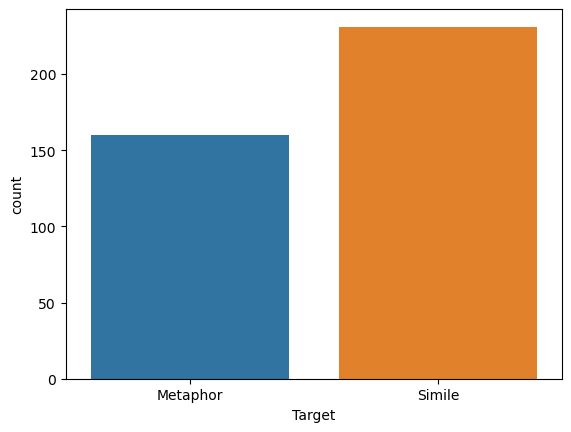

In [8]:
sns.countplot(x='Target',data=data)

C:\Users\santu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


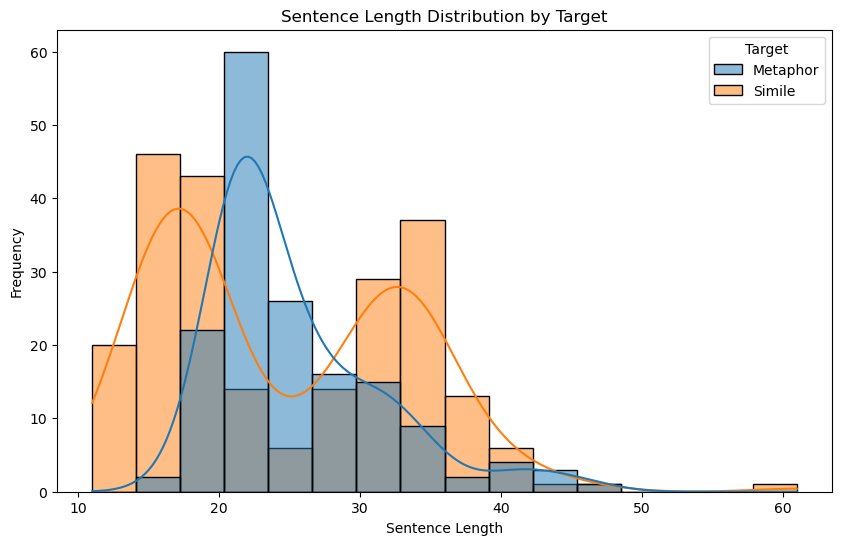

In [9]:
# Text Data Analysis
# Sentence length analysis
data['sentence_length'] = data['Sentence'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(data, x='sentence_length', hue='Target', kde=True)
plt.title('Sentence Length Distribution by Target')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Step 1: Vectorize the Text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Sentence'])
y = data['Target']

# Step 2: Encode the target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [12]:
# Step 3: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression

**But it has some pretty dissatisfying test results when it comes into comparison with NNs**

In [13]:
# Step 4: Train the Model
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [14]:
# Step 5: Evaluate the Model
y_pred = model1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        38

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



In [15]:
# You can also display the feature importances
coefficients = model1.coef_.flatten()
features = vectorizer.get_feature_names_out()
feature_importances = pd.DataFrame({
    'feature': features,
    'importance': coefficients
}).sort_values(by='importance', ascending=False)

print("\nTop 10 Positive Features:\n", feature_importances.head(10))
print("\nTop 10 Negative Features:\n", feature_importances.tail(10))


Top 10 Positive Features:
       feature  importance
11         as    6.526635
269      like    1.923393
48     bright    0.432839
233       hot    0.375832
314       old    0.361493
79      clear    0.352384
419  sparkled    0.339796
392    shower    0.335582
367      rock    0.319601
390     shone    0.306471

Top 10 Negative Features:
       feature  importance
155      fire   -0.502944
119    desert   -0.548991
295  mountain   -0.553624
487   whisper   -0.564354
222       her   -0.685353
313        of   -0.900574
226       his   -1.040748
485      were   -1.166359
452       the   -1.993897
478       was   -2.749636


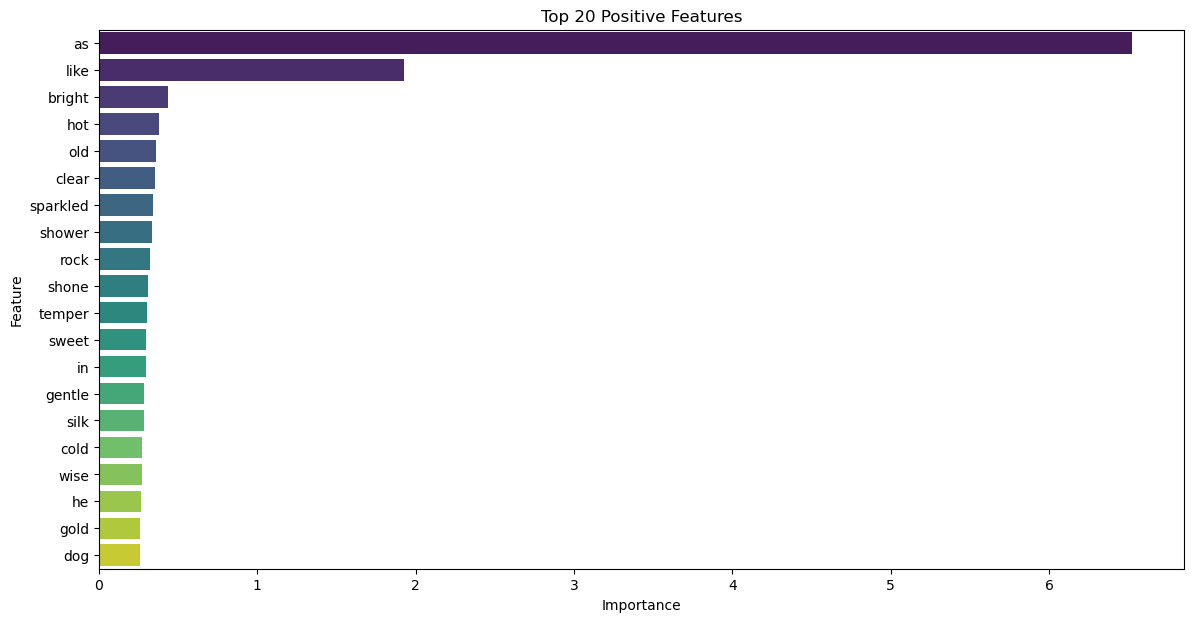

In [16]:
# Plot Top Positive and Negative Features
plt.figure(figsize=(14, 7))

top_positive_features = feature_importances.head(20)
sns.barplot(y='feature', x='importance', data=top_positive_features, palette='viridis')
plt.title('Top 20 Positive Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

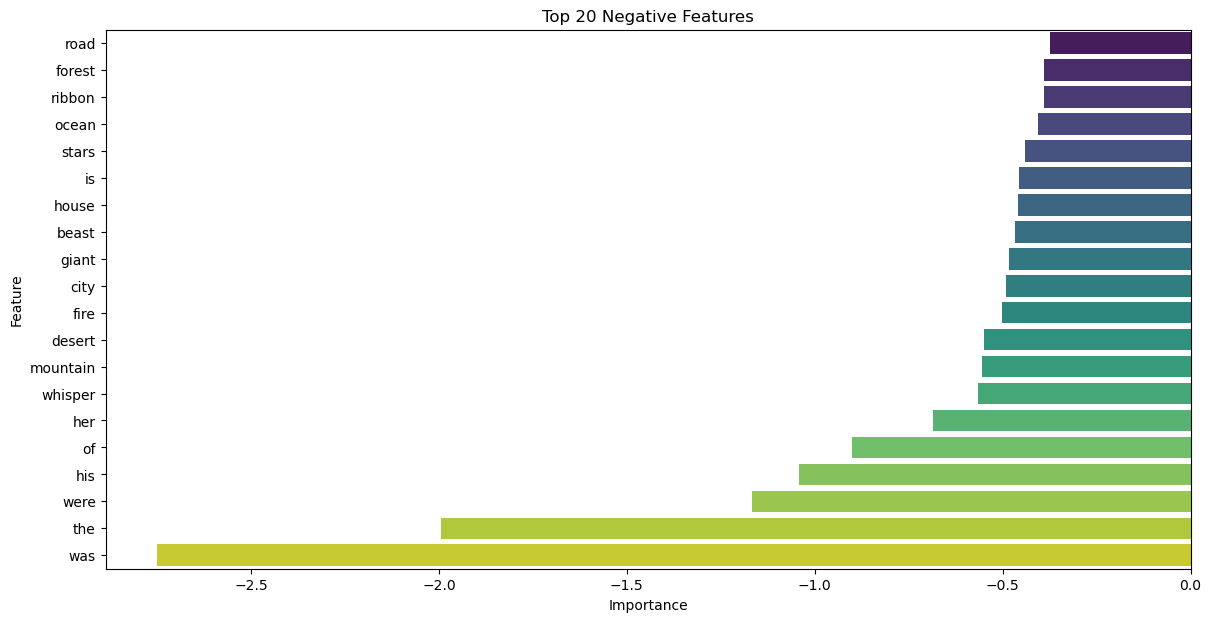

In [17]:
plt.figure(figsize=(14, 7))

top_negative_features = feature_importances.tail(20)
sns.barplot(y='feature', x='importance', data=top_negative_features, palette='viridis')
plt.title('Top 20 Negative Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **ANN**



In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [19]:
# Build the Neural Network Model
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\santu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [21]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         261,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,705 (1.50 MB)

 Trainable params: 392,705 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
for ele in X_train :
    print(ele)
    break

  (0, 270)	0.7222924235142234
  (0, 494)	0.6041349672119037
  (0, 478)	0.2332956009153811
  (0, 452)	0.24266800143272493


In [23]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=75,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=2)

Epoch 1/75
5/5 - 6s - 1s/step - accuracy: 0.4936 - loss: 0.6945 - val_accuracy: 0.4304 - val_loss: 0.6942
Epoch 2/75
5/5 - 0s - 54ms/step - accuracy: 0.5705 - loss: 0.6906 - val_accuracy: 0.5570 - val_loss: 0.6929
Epoch 3/75
5/5 - 0s - 68ms/step - accuracy: 0.5897 - loss: 0.6875 - val_accuracy: 0.5443 - val_loss: 0.6916
Epoch 4/75
5/5 - 0s - 54ms/step - accuracy: 0.6699 - loss: 0.6791 - val_accuracy: 0.5063 - val_loss: 0.6904
Epoch 5/75
5/5 - 0s - 52ms/step - accuracy: 0.6827 - loss: 0.6781 - val_accuracy: 0.4937 - val_loss: 0.6891
Epoch 6/75
5/5 - 0s - 50ms/step - accuracy: 0.6731 - loss: 0.6736 - val_accuracy: 0.4937 - val_loss: 0.6879
Epoch 7/75
5/5 - 0s - 50ms/step - accuracy: 0.6891 - loss: 0.6669 - val_accuracy: 0.4937 - val_loss: 0.6868
Epoch 8/75
5/5 - 0s - 51ms/step - accuracy: 0.6731 - loss: 0.6629 - val_accuracy: 0.4810 - val_loss: 0.6854
Epoch 9/75
5/5 - 0s - 49ms/step - accuracy: 0.6699 - loss: 0.6612 - val_accuracy: 0.4810 - val_loss: 0.6840
Epoch 10/75
5/5 - 0s - 52ms/st

In [24]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Classification Report:
               precision    recall  f1-score   support

    Metaphor       0.97      0.95      0.96        41
      Simile       0.95      0.97      0.96        38

    accuracy                           0.96        79
   macro avg       0.96      0.96      0.96        79
weighted avg       0.96      0.96      0.96        79



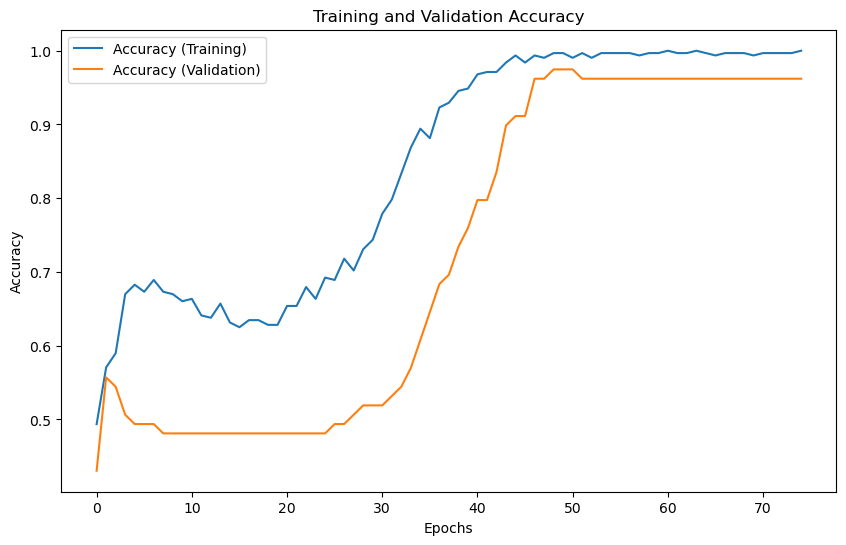

In [25]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy (Training)')
plt.plot(history.history['val_accuracy'], label='Accuracy (Validation)')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# TESTING SENTENCES

In [26]:
# Example sentences to classify
new_sentences = [
    "Her smile was as bright as the sun.",
    "The world is a stage, and we are merely players."
]
X_new = vectorizer.transform(new_sentences)


In [27]:


# Neural Network Predictions
nn_probabilities = model.predict(X_new)
nn_predictions = (nn_probabilities > 0.5).astype(int).flatten()
nn_predicted_labels = label_encoder.inverse_transform(nn_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


In [29]:
# Display the results
for i, sentence in enumerate(new_sentences):
    
    nn_simile_prob = nn_probabilities[i][0]
    nn_metaphor_prob = 1 - nn_simile_prob
    
    print(f"Sentence: {sentence}")
    print()
  
    print(f"Neural Network Prediction: {nn_predicted_labels[i]}")
    print()
    print(f"  Probability of being a Simile: {nn_simile_prob:.4f}")
    print(f"  Probability of being a Metaphor: {nn_metaphor_prob:.4f}")
    print()

Sentence: Her smile was as bright as the sun.

Neural Network Prediction: Simile

  Probability of being a Simile: 0.9424
  Probability of being a Metaphor: 0.0576

Sentence: The world is a stage, and we are merely players.

Neural Network Prediction: Metaphor

  Probability of being a Simile: 0.1348
  Probability of being a Metaphor: 0.8652



In [30]:
import pickle

with open('vector_model.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)

In [31]:
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [32]:
model.save('trained_model.h5')